In [1]:
from bs4 import BeautifulSoup as bs #For Webscrapping
import requests
import fbprophet

<p><b>Extracting Data from the webpage</b></p>

In [2]:
names=[]
years=[]
imdb_ratings=[]
genres=[]
metascores=[]
votes=[]
grosses=[]
certificates=[]
runtime=[]
directors=[]

page=1
for page in range(1,9):
    url='https://www.imdb.com/list/ls000634294/?st_dt=&mode=detail&page='+str(page)
    url=url+'&sort=list_order,asc'
    response=requests.get(url)
    soup=bs(response.text,'html.parser')
    movie_container=soup.find_all('div',class_='lister-item mode-detail')

    for containers in movie_container:
        

             #Movie metascore 
        try:
            metascore=containers.find('span',class_='metascore favorable') 
            metascore_movie=metascore.text
            metascores.append(metascore_movie)
        except:
            metascores.append("None")
            
            #Moviename    
        movie_name=containers.h3.a.text
        names.append(movie_name)
       
    #year
        year=containers.find('span',class_='lister-item-year text-muted unbold')
        movie_year=year.text
        years.append(movie_year)
   
  #Imdb Ratings
        try:
            rating=containers.find('span',class_='ipl-rating-star__rating').text
            imdb_ratings.append(rating)
        except:
            imdb_ratings.append("None")
   
  #Movie Ceruficates     
        try:
            movie_cerificate=containers.find('span',class_='certificate').text
            certificates.append(movie_cerificate)
        except:
            certificates.append("None")
  
  #RunTime
        movie_runtime=containers.find('span',class_='runtime').text
        runtime.append(movie_runtime)
   
  #Movie Genres     
        genre=containers.find('span',class_='genre')
        movie_genre=genre.text
        genres.append(movie_genre)
  
  #No. Of Votes
        vote=containers.find_all('span',attrs={'name':'nv'})[0]
        movie_votes=int(vote['data-value'])
        votes.append(movie_votes)
  
 # Collection      
        try:
            gross=containers.find_all('span',attrs={'name':'nv'})[1]
            movie_gross=gross['data-value']
            grosses.append(movie_gross)
        except:
            grosses.append("None")
  #Directors  
        movie_directors=containers.find_all('p',class_='text-muted text-small')[1].a.text
        directors.append(movie_directors)
        

<p><b>Storing extracted Data in the Tabular Form with the help of Pandas</b></p>

In [3]:
import pandas as pd
movies_data=pd.DataFrame({'MovieName':names,
'ReleasedYear':years,
'Metascores':metascores,
'ImdbRatings':imdb_ratings,                          
'MovieCertification':certificates,
'MovieRuntime':runtime,  
'MovieGenres':genres,    
'TotalVotes':votes,
'Box-Office($)':grosses,  
'Directors':directors                          
})

In [4]:
print(movies_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MovieName           787 non-null    object
 1   ReleasedYear        787 non-null    object
 2   Metascores          787 non-null    object
 3   ImdbRatings         787 non-null    object
 4   MovieCertification  787 non-null    object
 5   MovieRuntime        787 non-null    object
 6   MovieGenres         787 non-null    object
 7   TotalVotes          787 non-null    int64 
 8   Box-Office($)       787 non-null    object
 9   Directors           787 non-null    object
dtypes: int64(1), object(9)
memory usage: 61.6+ KB
None


<p><b>Observing the data collected from the weebpage</b></p>

In [5]:
print(movies_data)

                    MovieName ReleasedYear   Metascores ImdbRatings  \
0    The Shawshank Redemption       (1994)   80                 9.3   
1               The Godfather       (1972)  100                 9.2   
2                Pulp Fiction       (1994)   94                 8.9   
3      The Godfather: Part II       (1974)   90                   9   
4                   Inception       (2010)   74                 8.8   
..                        ...          ...          ...         ...   
782      Terminator Salvation       (2009)         None         6.5   
783              Spider-Man 3       (2007)         None         6.2   
784                      Loft   (I) (2010)         None         6.8   
785               The Descent       (2005)   71                 7.2   
786       The Descent: Part 2       (2009)         None         5.8   

    MovieCertification MovieRuntime  \
0                    A      142 min   
1                    A      175 min   
2                    A      15

<p><b>Cleaning Of the Data</b></p>

In [6]:
movies_data['ReleasedYear']=movies_data['ReleasedYear'].str[-5:-1]
movies_data['MovieGenres']=movies_data['MovieGenres'].str[1:]

<p><b>Example of cleaned data file<b><p>

In [7]:
movies_data.head()

,MovieName,ReleasedYear,Metascores,ImdbRatings,MovieCertification,MovieRuntime,MovieGenres,TotalVotes,Box-Office($),Directors
0,The Shawshank Redemption,1994,80,9.3,A,142 min,Drama,2379165,"28,341,469",Frank Darabont
1,The Godfather,1972,100,9.2,A,175 min,"Crime, Drama",1648204,"134,966,411",Francis Ford Coppola
2,Pulp Fiction,1994,94,8.9,A,154 min,"Crime, Drama",1853430,"107,928,762",Quentin Tarantino
3,The Godfather: Part II,1974,90,9,A,202 min,"Crime, Drama",1147487,"57,300,000",Francis Ford Coppola
4,Inception,2010,74,8.8,UA,148 min,"Action, Adventure, Sci-Fi",2101383,"292,576,195",Christopher Nolan


In [8]:
movies_data.to_csv('movies_data.csv')

In [9]:
import pandas as pd #For inporting excel file to dataframe
import matplotlib.pyplot as plt #For Developing Graphs
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv(r"C:\Users\vaibh\movies_data.csv")
df=df.rename(columns={'Box-Office($)': 'BoxOffice'})

<b>Histogram of Movies Released Every Year

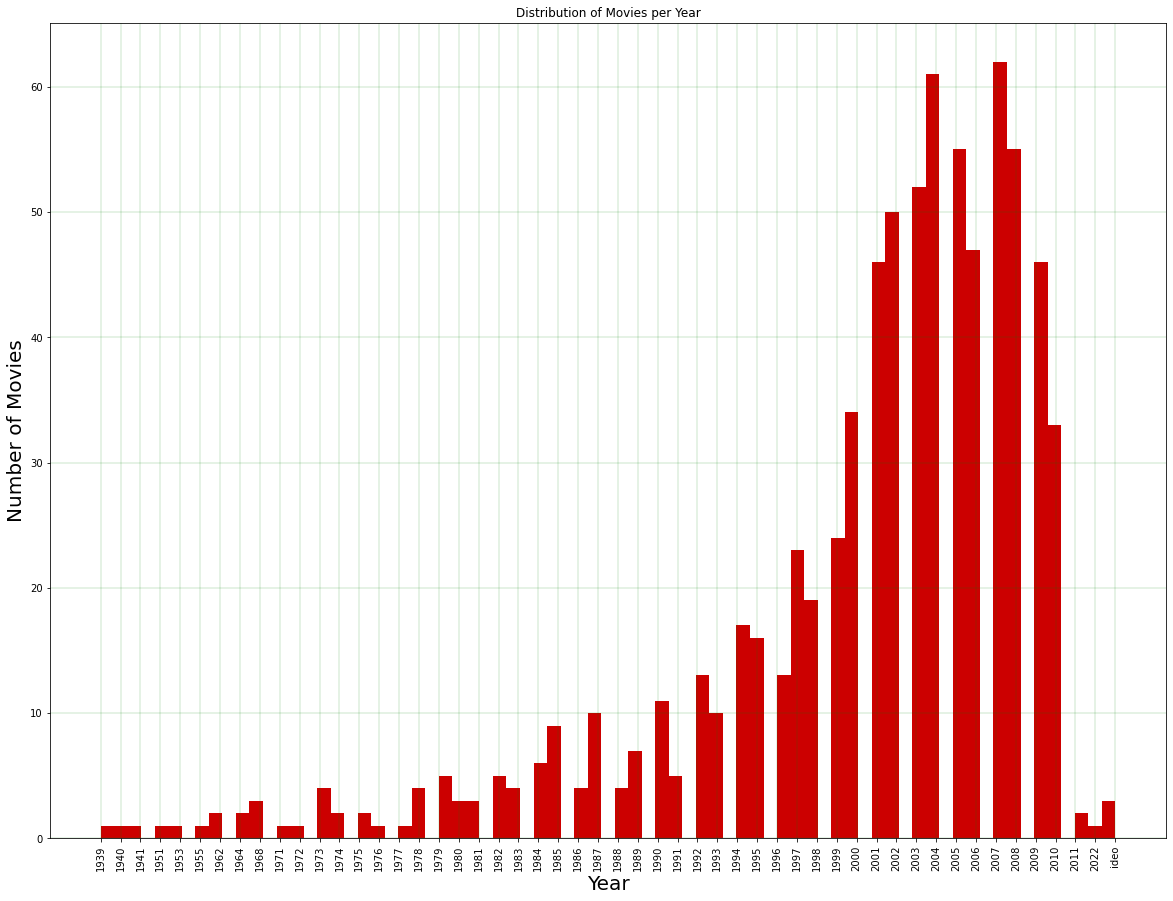

In [11]:
plt.figure(figsize=(20,15))
year=df.copy()
year.sort_values(by=['ReleasedYear'], inplace=True)
year.ReleasedYear.hist(bins=75,color='#CC0000')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of Movies",fontsize=20)
plt.title("Distribution of Movies per Year")
plt.xticks(rotation='vertical')
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()

<b>Boxplot for the Box Office Collection Of the movies over the year

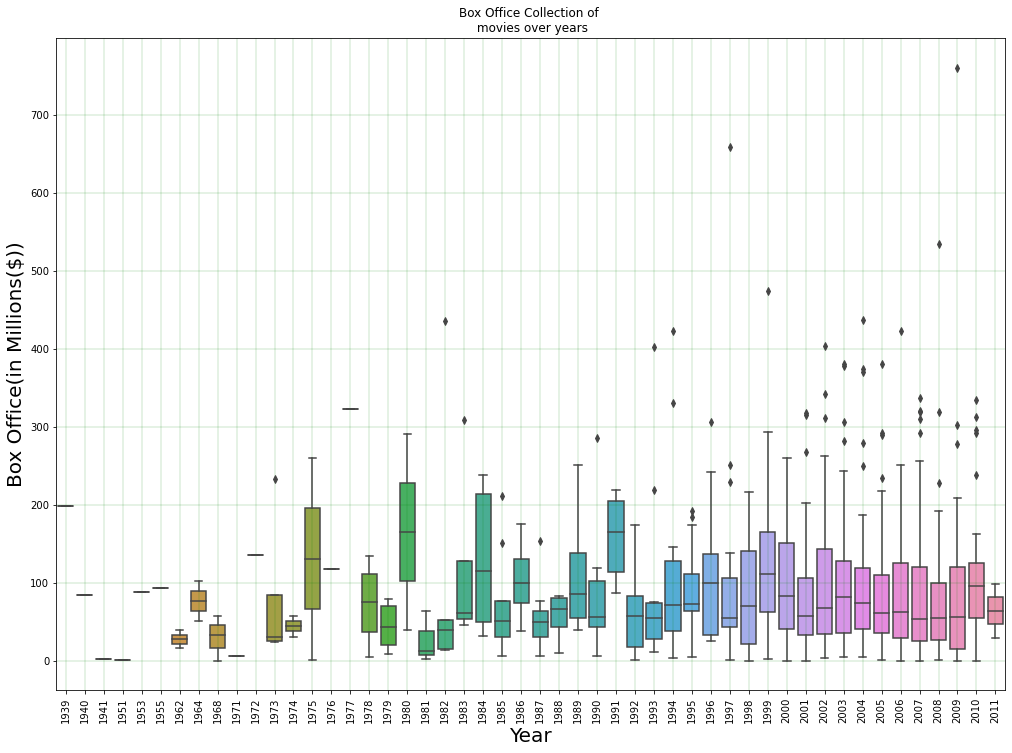

In [12]:
box=df.copy()
box['ReleasedYear'] = pd.Series(box['ReleasedYear'], dtype="str")
box=box[box.BoxOffice!= 'None']
box["BoxOffice"]=box["BoxOffice"].str.replace(",","").astype(float)
box["BoxOffice"]=box["BoxOffice"]/1000000
box["ReleasedYear"] = box["ReleasedYear"].astype(int)

plt.figure(figsize=(17,12))
sns.boxplot(y='BoxOffice',x='ReleasedYear',data=box)
plt.title("Box Office Collection of \n movies over years")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Box Office(in Millions($))",fontsize=20)
plt.xticks(rotation='vertical')
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')

plt.show()

<b>Number Of Movies By their Genres

Text(0, 0.5, 'Movie Certifiactes')

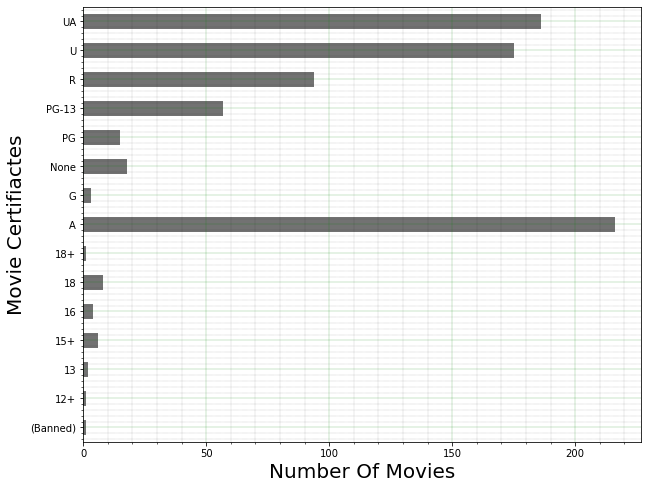

In [13]:
certifiactes=df.groupby(['MovieCertification'])['MovieCertification'].count()

certifiactes.plot.barh(figsize=(10, 8),color='#727272')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.xlabel("Number Of Movies",fontsize=20)
plt.ylabel("Movie Certifiactes",fontsize=20)

<b>Top Directors with highest average IMDb Ratings

In [14]:
direct=df.copy()
direct=direct[direct.ImdbRatings!= 'None']
direct["ImdbRatings"] = direct["ImdbRatings"].astype(float)
direct=direct.groupby(['Directors'])['ImdbRatings'].mean().sort_values(ascending=False).head(10)
directors=pd.DataFrame(data=direct,columns=["ImdbRatings"])
directors.reset_index(level=0,inplace=True) 

directors.style.bar(subset=['ImdbRatings'], color='lightblue',width=100)

,Directors,ImdbRatings
0,Francis Ford Coppola,8.600000
1,Roman Polanski,8.500000
2,Roger Allers,8.500000
3,Tony Kaye,8.500000
4,Christopher Nolan,8.350000
5,Frank Darabont,8.333333
6,Richard Marquand,8.300000
7,Stanley Kubrick,8.300000
8,Peter Jackson,8.220000
9,James McTeigue,8.200000


<b>Scatter Plot foe the relation between Total Votes and Imdb Ratings

Text(0, 0.5, 'Total Votes(Thousands)')

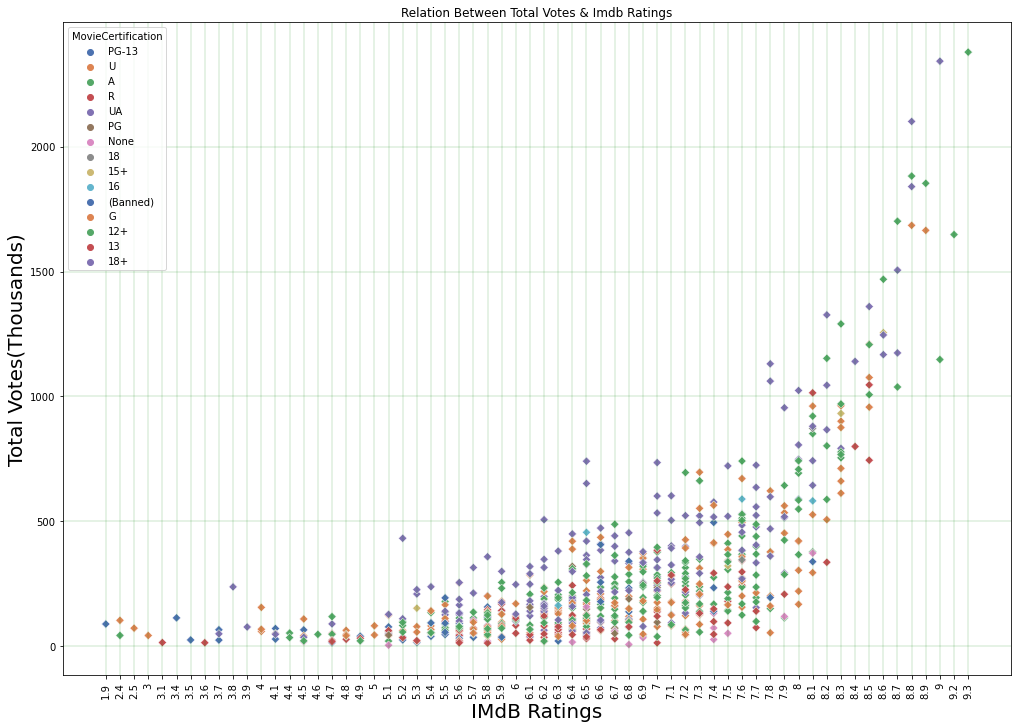

In [15]:
scatter=df.copy()
scatter=scatter[scatter.ImdbRatings!= 'None']
scatter.sort_values(by=['ImdbRatings'], inplace=True)
scatter["TotalVotes"]=scatter["TotalVotes"]/1000

plt.figure(figsize=(17,12))
sns.scatterplot(x='ImdbRatings', y='TotalVotes', data=scatter, marker='D', hue='MovieCertification', palette='deep')
plt.title("Relation Between Total Votes & Imdb Ratings")
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.xticks(rotation='vertical')
plt.xlabel("IMdB Ratings",fontsize=20)
plt.ylabel("Total Votes(Thousands)",fontsize=20)

<b>Percentahe of Movies By Their Genres

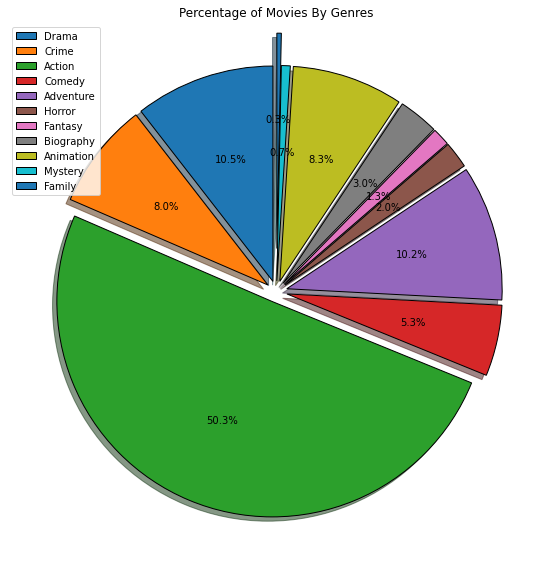

In [16]:
genre_popularity=df.copy()
genre_popularity=genre_popularity[genre_popularity.MovieGenres!= 'None']
genre_popularity=genre_popularity.MovieGenres.str.split(",").str[0].tolist()

def getDuplicatesWithCount(listOfElems):
    dictOfElems = dict()
    for elem in listOfElems:
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
    return dictOfElems

dictOfElems=getDuplicatesWithCount(genre_popularity)
dictOfElems = {x.replace(' ', ''): v  
     for x, v in dictOfElems.items()} 

genre_popularity=pd.DataFrame(dictOfElems.items(), columns=['Genre','TotalMovies'])
genre_popularity["TotalMovies"] = genre_popularity["TotalMovies"].astype(float)

plt.figure(figsize=(10,8))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2)

plt.pie(genre_popularity['TotalMovies'],shadow=True,startangle=90,autopct='%.1f%%'
       ,wedgeprops={'edgecolor':'black'},explode=explode)
plt.legend(genre_popularity["Genre"], loc="best")
plt.title("Percentage of Movies By Genres")
plt.tight_layout()
plt.show()
